# EDA : Standford Dogs Dataset 


In [102]:
import os
import numpy as np
import matplotlib.pyplot as plt 

from common_params import data_dir
import scipy.io
import fnmatch
import pandas as pd 
import cv2 # opencv

In [11]:

test_mat = scipy.io.loadmat(data_dir + 'test_data.mat')

In [12]:
test_mat.keys()


dict_keys(['__header__', '__version__', '__globals__', 'test_info', 'test_fg_data', 'test_data'])

In [13]:
train_mat = scipy.io.loadmat(data_dir + 'train_data.mat')

In [14]:
train_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train_info', 'train_fg_data', 'train_data'])

# Number of images per files 



In [120]:
image_dir = data_dir + "Images\\"
data = pd.DataFrame()

for folder in os.scandir(image_dir): 
    folder_name = folder.name
    dog_breed = folder.name.split('-')[1]

    if folder.is_dir : 
        cnt = len(fnmatch.filter(os.scandir(folder), "*.*"))
    data = data.append({'dog_breed' : dog_breed, 'folder_name' :folder.name, 'image_count' : cnt },ignore_index=True)

    

In [121]:

data = data.sort_values(by="image_count")

In [122]:
data.describe()

,image_count
count,120.000000
mean,171.500000
std,23.220898
min,148.000000
25%,152.750000
50%,159.500000
75%,186.250000
max,252.000000


In [123]:
data.head()

,dog_breed,folder_name,image_count
17,redbone,n02090379-redbone,148.0
3,Pekinese,n02086079-Pekinese,149.0
74,malinois,n02105162-malinois,150.0
70,Irish_water_spaniel,n02102973-Irish_water_spaniel,150.0
71,kuvasz,n02104029-kuvasz,150.0


In [137]:
def get_image_from_breed(data, breed): 
    folder = data[data["dog_breed"] == breed]["folder_name"].values[0]
    redboneDir  = image_dir + folder
    image_path = os.path.join(redboneDir , os.listdir(redboneDir)[0])
    img = cv2.imread(image_path)
    return img 


In [143]:
data.head(4)['dog_breed'].values

array(['redbone', 'Pekinese', 'malinois', 'Irish_water_spaniel'],
      dtype=object)

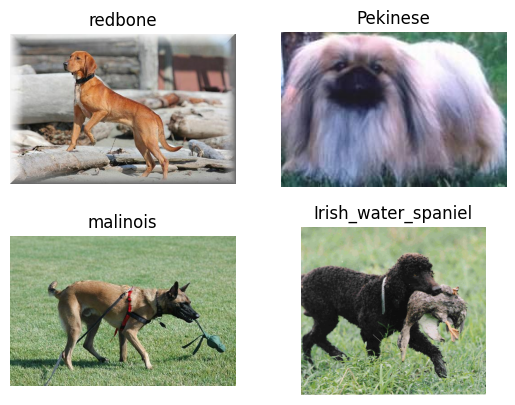

In [146]:
N, M = 2,2
breed_list = data.head(N+M)['dog_breed'].values
fig, axs = plt.subplots(N,M)
cnt = 0 
for i in range(N) : 
    for j in range(M) : 
        axs[i,j].imshow(cv2.cvtColor(get_image_from_breed(data, breed_list[cnt]),cv2.IMREAD_ANYCOLOR))
        axs[i,j].set_title(breed_list[cnt])
        axs[i,j].axis("off")
        cnt = cnt + 1 